importing modules

In [3]:
import numpy as np
import pandas as pd

# dataset loading using pandas dataframe

In [4]:
df= pd.read_csv('/content/drive/MyDrive/Datasets/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# exploring data

In [5]:
# number of columns in the set
print(len(df.columns))

14


In [6]:
# shape of data
print(df.shape)

(10000, 14)


In [7]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
#getting the basic data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
# checking for duplicated rows in the dataset
df.duplicated().sum()

0

# check for value counts for columns

In [10]:
# the reult column
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
# check the number of geographical location people belong to
df['Geography'].value_counts()


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
# checking for gender type
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

# Data preprocessing


## dropping the columns that seems unnecessary

In [13]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
print(len(df.columns))

11


# encoding the categorical variables: Geography and Gender

In [16]:
df= pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.5 KB


In [18]:
df['Geography_Germany']= df['Geography_Germany'].astype(int)

In [19]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,0,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,0,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,True,False


In [20]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,0,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,0,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,0,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,False,True


In [21]:
df['Geography_Spain']= df['Geography_Spain'].astype(int)

In [22]:
df['Gender_Male']= df['Gender_Male'].astype(int)

In [23]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


# data scaling

In [24]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


## To scale the data, first we will spilt the dataset

In [25]:
# dataset partition into feature and target

x=df.drop(columns='Exited')
y= df['Exited']
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=2)

# print x and y

In [26]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [27]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [28]:
print(x.shape)

(10000, 11)


In [29]:
print(y.shape)

(10000,)


# printing x_train and y_train shape

In [30]:
print('x-train shape:',x_train.shape)
print('y-train shape:',y_train.shape)

x-train shape: (8000, 11)
y-train shape: (8000,)


## now scale the data

In [34]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

# scale the train data
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

view the scaled data

In [35]:
x_train_scaled

array([[ 1.27754581, -1.23264342, -0.012743  , ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       [-0.49959477,  0.28410615,  0.33282985, ...,  1.71207591,
        -0.57138416, -1.0862028 ],
       [ 0.67827747, -0.09508124, -1.39503438, ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       ...,
       [ 2.06279398, -0.28467494, -0.70388869, ..., -0.58408625,
        -0.57138416,  0.9206384 ],
       [-1.02653762,  1.42166833, -0.012743  , ...,  1.71207591,
        -0.57138416,  0.9206384 ],
       [ 0.03768029, -1.04304972,  0.67840269, ..., -0.58408625,
        -0.57138416, -1.0862028 ]])

In [36]:
x_test_scaled

array([[ 8.33260665e-01, -9.50812388e-02,  1.71512123e+00, ...,
        -5.84086250e-01, -5.71384156e-01, -1.08620280e+00],
       [-5.53096261e-02,  1.89309306e-01, -1.04946154e+00, ...,
         1.71207591e+00, -5.71384156e-01, -1.08620280e+00],
       [-3.34279369e-01,  1.61126203e+00,  6.78402693e-01, ...,
        -5.84086250e-01, -5.71384156e-01,  9.20638397e-01],
       ...,
       [ 8.74589516e-01, -9.50812388e-02, -1.39503438e+00, ...,
        -5.84086250e-01, -5.71384156e-01, -1.08620280e+00],
       [ 3.88975520e-01, -2.84390545e-04, -1.74060723e+00, ...,
        -5.84086250e-01, -5.71384156e-01, -1.08620280e+00],
       [ 7.29938538e-01,  6.63293547e-01, -1.39503438e+00, ...,
        -5.84086250e-01, -5.71384156e-01,  9.20638397e-01]])

# Building the ANN model

In [41]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [42]:
model = Sequential()
model.add(Dense(5, activation= 'relu', input_dim= 11))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 60        
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## compile the model

In [45]:
model.compile(loss='binary_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

## fit the model with training data

In [48]:
history= model.fit(x_train_scaled, y_train,epochs=20,validation_split= 0.2)

Epoch 1/20
200/200 [==============================] - 1s 3ms/step - loss: 0.3766 - accuracy: 0.8347 - val_loss: 0.3561 - val_accuracy: 0.8506
Epoch 2/20
200/200 [==============================] - 1s 3ms/step - loss: 0.3735 - accuracy: 0.8359 - val_loss: 0.3536 - val_accuracy: 0.8531
Epoch 3/20
200/200 [==============================] - 1s 4ms/step - loss: 0.3712 - accuracy: 0.8395 - val_loss: 0.3523 - val_accuracy: 0.8487
Epoch 4/20
200/200 [==============================] - 1s 4ms/step - loss: 0.3689 - accuracy: 0.8378 - val_loss: 0.3509 - val_accuracy: 0.8512
Epoch 5/20
200/200 [==============================] - 1s 4ms/step - loss: 0.3674 - accuracy: 0.8409 - val_loss: 0.3498 - val_accuracy: 0.8494
Epoch 6/20
200/200 [==============================] - 1s 4ms/step - loss: 0.3659 - accuracy: 0.8409 - val_loss: 0.3501 - val_accuracy: 0.8456
Epoch 7/20
200/200 [==============================] - 1s 4ms/step - loss: 0.3647 - accuracy: 0.8447 - val_loss: 0.3482 - val_accuracy: 0.8500
Epoch 

# plotting of the loss and accuracy curves

In [49]:
import matplotlib.pyplot as plt

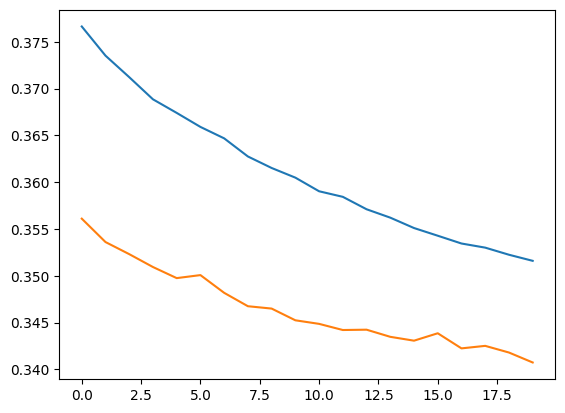

In [54]:
# loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

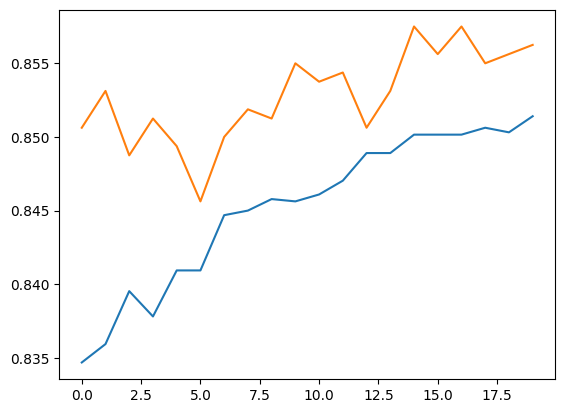

In [55]:
# accuracy curve

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])